In [4]:
# Siamese Architecture for face recognition

import random
import numpy as np
import time
import tensorflow as tf
import math
import pdb
import sys
import scipy.io as sio
from sklearn import *
import matplotlib.pyplot as plt
import os

In [2]:
def Plot_ROC_Fn(label,distance,save_path):

    fpr, tpr, thresholds = metrics.roc_curve(label, distance, pos_label=1)
    AUC = metrics.roc_auc_score(label, distance, average='macro', sample_weight=None)
    # AP = metrics.average_precision_score(label, -distance, average='macro', sample_weight=None)

    # Calculating EER
    intersect_x = fpr[np.abs(fpr - (1 - tpr)).argmin(0)]
    EER = intersect_x
    print("EER = ", float(("{0:.%ie}" % 1).format(intersect_x)))

    # AUC(area under the curve) calculation
    print("AUC = ", float(("{0:.%ie}" % 1).format(AUC)))

    # # AP(average precision) calculation.
    # # This score corresponds to the area under the precision-recall curve.
    # print("AP = ", float(("{0:.%ie}" % 1).format(AP)))

    # Plot the ROC
    fig = plt.figure()
    ax = fig.gca()
    lines = plt.plot(fpr, tpr, label='ROC Curve')
    plt.setp(lines, linewidth=2, color='r')
    ax.set_xticks(np.arange(0, 1.1, 0.1))
    ax.set_yticks(np.arange(0, 1.1, 0.1))
    plt.title('ROC.jpg')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    # # Cutting the floating number
    # AUC = '%.2f' % AUC
    # EER = '%.2f' % EER
    # # AP = '%.2f' % AP
    #
    # # Setting text to plot
    # # plt.text(0.5, 0.6, 'AP = ' + str(AP), fontdict=None)
    # plt.text(0.5, 0.5, 'AUC = ' + str(AUC), fontdict=None)
    # plt.text(0.5, 0.4, 'EER = ' + str(EER), fontdict=None)
    plt.grid()
    plt.show()
    fig.savefig(save_path)

EER =  0.62
AUC =  0.48


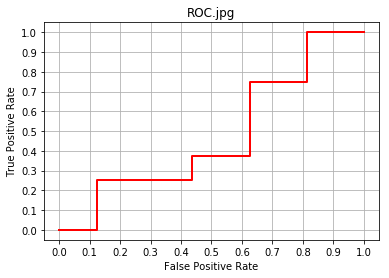

In [5]:
evaluation_dir = '../../results/SCORES' # Directory where checkpoints and event logs are written to.
plot_dir = '../../results/PLOTS' # Directory where plots are saved to.

# Loading scores and labels
score = np.load(os.path.join(evaluation_dir,'score_vector.npy'))
label = np.load(os.path.join(evaluation_dir,'target_label_vector.npy'))
save_path = os.path.join(plot_dir,'ROC.jpg')

# Creating the path
if not os.path.exists(plot_dir):
        os.makedirs(plot_dir)

Plot_ROC_Fn(label,score,save_path)